<h1>Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Decent</h1>


<h2>Table of Contents</h2>
<p>In this Lab, you will practice training a model by using Mini-Batch Gradient Descent.</p>

<ul>
    <li><a href="#Make-Some-Data">Make Some Data</a></li>
    <li><a href="#Create-the-Model-and-Cost-Function-(Total-Loss)">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train-the-Model:-Batch-Gradient-Descent">Train the Model: Batch Gradient Descent</a></li>
    <li><a href="#Train-the-Model:-Stochastic-Gradient-Descent-with-Dataset-DataLoader">Train the Model: Stochastic Gradient Descent with Dataset DataLoader</a></li>
    <li><a href="#Train-the-Model:-Mini-Batch-Gradient-Descent:-Batch-Size-Equals-5">Train the Model: Mini Batch Gradient Descent: Batch Size Equals 5</a></li>
    <li><a href="#Train-the-Model:-Mini-Batch-Gradient-Descent:-Batch-Size-Equals-10">Train the Model: Mini Batch Gradient Descent: Batch Size Equals 10</a></li>
</ul>
<p>Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


<h2>Preparation</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<!-- <h2 id="Makeup_Data">Make Some Data </h2>
 -->
 ## Make Some Data


In [3]:
import torch
torch.manual_seed(1)

In [4]:
# Generate the data with noise and the line
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

<!-- <h2 id="Model_Cost">Create the Model and Cost Function (Total Loss) </h2>
 -->
 ## Create the Model and Cost Function (Total Loss)


In [6]:
# Define the prediction function
def forward(x):
    return w * x + b

In [7]:
# Define the cost function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<!-- <h2>Train the Model: Batch Gradient Descent (BGD)</h2>
 -->
 ## Train the Model: Batch Gradient Descent


In [8]:
# Define the function for training model

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
LOSS_BGD = []

def train_model_BGD(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        LOSS_BGD.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 10 epochs of batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space.


In [9]:
# Run train_model_BGD with 10 iterations
train_model_BGD(10)

<!-- <h2 id="SGD"> Stochastic Gradient Descent (SGD) with Dataset DataLoader</h2>
 -->
 ## Train the Model: Stochastic Gradient Descent with Dataset DataLoader


In [10]:
from torch.utils.data import Dataset, DataLoader

In [11]:
# Create class Data

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get length
    def __len__(self):
        return self.len

In [12]:
# Create Data object and DataLoader object
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [17]:
# Define train_model_SGD function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_SGD = []
lr = 0.1
def train_model_SGD(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS_SGD.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

In [18]:
# Run train_model_SGD(iter) with 10 iterations
train_model_SGD(10)

<!--Empty Space for separating topics-->


<!-- <h2 id="Mini5">Mini Batch Gradient Descent: Batch Size Equals 5</h2>
 -->
 ## Train the Model: Mini Batch Gradient Descent: Batch Size Equals 5


In [19]:
# Create DataLoader object and Data object
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [20]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

Run 10 epochs of mini-batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space.


In [21]:
# Run train_model_Mini5 with 10 iterations.
train_model_Mini5(10)

<!--Empty Space for separating topics-->


<!-- <h2 id="Mini10">Mini Batch Gradient Descent: Batch Size Equals 10</h2>
 -->
 ## Train the Model: Mini Batch Gradient Descent: Batch Size Equals 10


In [22]:
# Create DataLoader object
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

Define <code>train_model_Mini10</code> function for training the model.


In [23]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_Mini10(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS_MINI10.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

In [24]:
# Run train_model_Mini5 with 10 iterations.
train_model_Mini10(10)

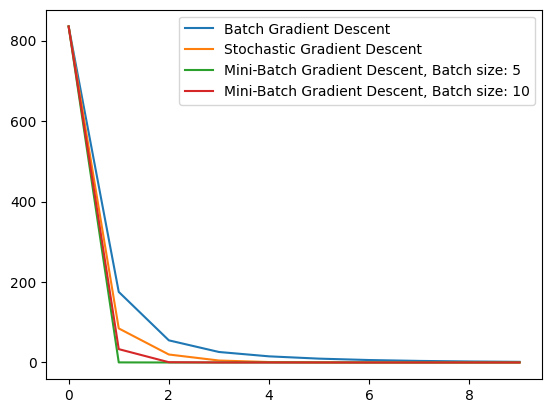

In [25]:
# Plot out the LOSS for each method
LOSS_BGD= [ loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()